# Assignment 1

### Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

### Load data

In [2]:
info_1 = pd.read_csv("data/info_1.csv", header=None) 
info_2 = pd.read_csv("data/info_2.csv", header=None) 
test_no_label_1 = pd.read_csv("data/test_no_label_1.csv", header=None) 
test_no_label_2 = pd.read_csv("data/test_no_label_2.csv",header=None) 
test_with_label_1 = pd.read_csv("data/test_with_label_1.csv", header=None) 
test_with_label_2 = pd.read_csv("data/test_with_label_2.csv", header=None) 
train_1 = pd.read_csv("data/train_1.csv", header=None) 
train_2 = pd.read_csv("data/train_2.csv", header=None) 
val_1 = pd.read_csv("data/val_1.csv", header=None) 
val_2 = pd.read_csv("data/val_2.csv", header=None) 
sample_submission = pd.read_csv("data/sample_submission.csv", header=None) 

### Partition the data sets 1 & 2 into train, val and test

In [3]:
# Data set 1
X_train_1 = train_1.iloc[:, 0:1024].to_numpy()
Y_train_1 = train_1.iloc[:, 1024:1025].to_numpy().ravel()

X_val_1 = val_1.iloc[:, 0:1024].to_numpy()
Y_val_1 = val_1.iloc[:, 1024:1025].to_numpy().ravel()

X_test_1 = test_with_label_1.iloc[:, 0:1024].to_numpy()
Y_test_1 = test_with_label_1.iloc[:, 1024:1025].to_numpy().ravel()

# Data set 2
X_train_2 = train_2.iloc[:, 0:1024].to_numpy()
Y_train_2 = train_2.iloc[:, 1024:1025].to_numpy().ravel()

X_val_2 = val_2.iloc[:, 0:1024].to_numpy()
Y_val_2 = val_2.iloc[:, 1024:1025].to_numpy().ravel()

X_test_2 = test_with_label_2.iloc[:, 0:1024].to_numpy()
Y_test_2 = test_with_label_2.iloc[:, 1024:1025].to_numpy().ravel()

### Distribution of Classes

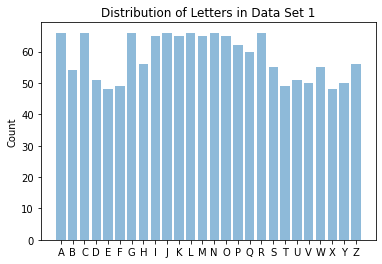

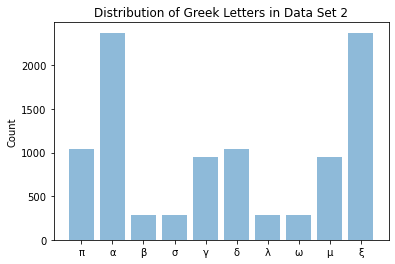

In [64]:
DataSet_Y_1 = np.concatenate((Y_train_1, Y_val_1, Y_test_1), axis=0) 
DataSet_Y_2 = np.concatenate((Y_train_2, Y_val_2, Y_test_2), axis=0) 
DataSet_Count_1 = np.bincount(DataSet_Y_1)
DataSet_Count_2 = np.bincount(DataSet_Y_2)

# DS1
labels_1 =  [chr(x) for x in range(ord('A'), ord('Z') + 1)]
labels_value_1 = np.arange(len(labels_1))

plt.bar(labels_value_1, DataSet_Count_1, align='center', alpha=0.5)
plt.xticks(labels_value_1, labels_1)
plt.ylabel('Count')
plt.title('Distribution of Letters in Data Set 1')

plt.show()

# DS2
labels_2 =  ['π', 'α', 'β', 'σ', 'γ', 'δ', 'λ', 'ω', 'μ', 'ξ']
labels_value_2 = np.arange(len(labels_2))

plt.bar(labels_value_2, DataSet_Count_2, align='center', alpha=0.5)
plt.xticks(labels_value_2, labels_2)
plt.ylabel('Count')
plt.title('Distribution of Greek Letters in Data Set 2')

plt.show()

### Analysis of datasets

#### For Data Set 1 (Letters from A to Z)
The dataset 1 is mostly evenly distributed. One thing that could make the models less performant is the big amount of classes in this set (26 in this case). So the models will require to make a decision of classifying between 26 classes. If we were to make a random choice, each class would have a 1/26 probability of occurrence. So the models have less chance of being correct by leveraging luck.

#### For Data Set 2 (10 Greek Letters)
The dataset 2 is not evenly distributed, this could lead to some some letters being better classified than other letters that occur much less.
Another thing is that because there are less classes than in the first data set, this dataset has 1/10 chance of guessing the correct class by a random guess. So this dataset provides better odds to the same model than the previous dataset.

### GNB

In [4]:
# Imports for GNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# DS1
trained_model_1 = gnb.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = gnb.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
GNB_DS1 = pd.DataFrame(data=Y_pred_1)
GNB_DS1.index = GNB_DS1.index + 1
GNB_DS1.to_csv("output_files/GNB-DS1.csv", header=None)

GNB_DS2 = pd.DataFrame(data=Y_pred_2)
GNB_DS2.index = GNB_DS2.index + 1
GNB_DS2.to_csv("output_files/GNB-DS2.csv", header=None)

f_GNB_DS1 = open("output_files/GNB-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_GNB_DS1.write("\nConfusion Matrix:\n\n")
f_GNB_DS1.write(str(conf_1))
f_GNB_DS1.write("\n\nClassification Report:\n\n")
f_GNB_DS1.write(str(report_1))
f_GNB_DS1.close()

f_GNB_DS2 = open("output_files/GNB-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_GNB_DS2.write("\nConfusion Matrix:\n\n")
f_GNB_DS2.write(str(conf_2))
f_GNB_DS2.write("\n\nClassification Report:\n\n")
f_GNB_DS2.write(str(report_2))
f_GNB_DS2.close()

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Note:
- The warning is generated (from the first dataset) because the letter E corresponding to value 4 
is never predicted by our model when it should have been predicted 2 times
in the Y_test_1.
- This leads to a denominator of 0 in the precision calculation and the same for the F1 measure therefore the report defaults these values to 0.0 .

### Base-DT

In [5]:
# Imports for DT
from sklearn.tree import DecisionTreeClassifier

base_dt = DecisionTreeClassifier(criterion="entropy", random_state=0)

# DS1
trained_model_1 = base_dt.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = base_dt.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
Base_DT_DS1 = pd.DataFrame(data=Y_pred_1)
Base_DT_DS1.index = Base_DT_DS1.index + 1
Base_DT_DS1.to_csv("output_files/Base-DT-DS1.csv", header=None)

Base_DT_DS2 = pd.DataFrame(data=Y_pred_2)
Base_DT_DS2.index = Base_DT_DS2.index + 1
Base_DT_DS2.to_csv("output_files/Base-DT-DS2.csv", header=None)

f_Base_DT_DS1 = open("output_files/Base-DT-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_Base_DT_DS1.write("\nConfusion Matrix:\n\n")
f_Base_DT_DS1.write(str(conf_1))
f_Base_DT_DS1.write("\n\nClassification Report:\n\n")
f_Base_DT_DS1.write(str(report_1))
f_Base_DT_DS1.close()

f_Base_DT_DS2 = open("output_files/Base-DT-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_Base_DT_DS2.write("\nConfusion Matrix:\n\n")
f_Base_DT_DS2.write(str(conf_2))
f_Base_DT_DS2.write("\n\nClassification Report:\n\n")
f_Base_DT_DS2.write(str(report_2))
f_Base_DT_DS2.close()

/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Best-DT

In [13]:
# Imports for DT
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy'], 
    'max_depth':[10, None],
    'min_samples_split':[1, 2, 3, 4],
    'min_impurity_decrease':[0.0, 0.5],
    'class_weight':[None, 'balanced'],
}
# DecisionTreeClassifier
best_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, n_jobs=-1)

# DS1
trained_model_1 = best_dt.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = best_dt.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
Best_DT_DS1 = pd.DataFrame(data=Y_pred_1)
Best_DT_DS1.index = Best_DT_DS1.index + 1
Best_DT_DS1.to_csv("output_files/Best-DT-DS1.csv", header=None)

Best_DT_DS2 = pd.DataFrame(data=Y_pred_2)
Best_DT_DS2.index = Best_DT_DS2.index + 1
Best_DT_DS2.to_csv("output_files/Best-DT-DS2.csv", header=None)

f_Best_DT_DS1 = open("output_files/Best-DT-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_Best_DT_DS1.write("\nConfusion Matrix:\n\n")
f_Best_DT_DS1.write(str(conf_1))
f_Best_DT_DS1.write("\n\nClassification Report:\n\n")
f_Best_DT_DS1.write(str(report_1))
f_Best_DT_DS1.close()

f_Best_DT_DS2 = open("output_files/Best-DT-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_Best_DT_DS2.write("\nConfusion Matrix:\n\n")
f_Best_DT_DS2.write(str(conf_2))
f_Best_DT_DS2.write("\n\nClassification Report:\n\n")
f_Best_DT_DS2.write(str(report_2))
f_Best_DT_DS2.close()

In [15]:
print("Best hyperparameters:")
print(trained_model_1.best_params_)
print(trained_model_2.best_params_)

Best hyperparameters:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_split': 2}


### Perceptron

In [19]:
# Imports for Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()

# DS1
trained_model_1 = perceptron.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = perceptron.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
Perceptron_DS1 = pd.DataFrame(data=Y_pred_1)
Perceptron_DS1.index = Perceptron_DS1.index + 1
Perceptron_DS1.to_csv("output_files/PER-DS1.csv", header=None)

Perceptron_DS2 = pd.DataFrame(data=Y_pred_2)
Perceptron_DS2.index = Perceptron_DS2.index + 1
Perceptron_DS2.to_csv("output_files/PER-DS2.csv", header=None)

f_Perceptron_DS1 = open("output_files/PER-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_Perceptron_DS1.write("\nConfusion Matrix:\n\n")
f_Perceptron_DS1.write(str(conf_1))
f_Perceptron_DS1.write("\n\nClassification Report:\n\n")
f_Perceptron_DS1.write(str(report_1))
f_Perceptron_DS1.close()

f_Perceptron_DS2 = open("output_files/PER-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_Perceptron_DS2.write("\nConfusion Matrix:\n\n")
f_Perceptron_DS2.write(str(conf_2))
f_Perceptron_DS2.write("\n\nClassification Report:\n\n")
f_Perceptron_DS2.write(str(report_2))
f_Perceptron_DS2.close()

### Base-MLP

In [23]:
# Imports for MLP
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='logistic', solver='sgd')

# DS1
trained_model_1 = mlp.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = mlp.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
MLP_DS1 = pd.DataFrame(data=Y_pred_1)
MLP_DS1.index = MLP_DS1.index + 1
MLP_DS1.to_csv("output_files/Base-MLP-DS1.csv", header=None)

MLP_DS2 = pd.DataFrame(data=Y_pred_2)
MLP_DS2.index = MLP_DS2.index + 1
MLP_DS2.to_csv("output_files/Base-MLP-DS2.csv", header=None)

f_MLP_DS1 = open("output_files/Base-MLP-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_MLP_DS1.write("\nConfusion Matrix:\n\n")
f_MLP_DS1.write(str(conf_1))
f_MLP_DS1.write("\n\nClassification Report:\n\n")
f_MLP_DS1.write(str(report_1))
f_MLP_DS1.close()

f_MLP_DS2 = open("output_files/Base-MLP-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_MLP_DS2.write("\nConfusion Matrix:\n\n")
f_MLP_DS2.write(str(conf_2))
f_MLP_DS2.write("\n\nClassification Report:\n\n")
f_MLP_DS2.write(str(report_2))
f_MLP_DS2.close()

/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Best-MLP

In [24]:
# Imports for MLP
from sklearn.neural_network import MLPClassifier

parameters = {
    'activation':['logistic', 'tanh', 'relu', 'identity'], 
    'hidden_layer_sizes':[(30, 50), (10, 10, 10)],
    'solver':['adam', 'sgd'],
}
# Best MLP
mlp = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters, n_jobs=-1)

# DS1
trained_model_1 = mlp.fit(X_train_1, Y_train_1)
Y_pred_1 = trained_model_1.predict(X_test_1)

# DS2
trained_model_2 = mlp.fit(X_train_2, Y_train_2)
Y_pred_2 = trained_model_2.predict(X_test_2)

# Outputs
MLP_DS1 = pd.DataFrame(data=Y_pred_1)
MLP_DS1.index = MLP_DS1.index + 1
MLP_DS1.to_csv("output_files/Best-MLP-DS1.csv", header=None)

MLP_DS2 = pd.DataFrame(data=Y_pred_2)
MLP_DS2.index = MLP_DS2.index + 1
MLP_DS2.to_csv("output_files/Best-MLP-DS2.csv", header=None)

f_MLP_DS1 = open("output_files/Best-MLP-DS1.csv", "a")
conf_1 = confusion_matrix(Y_test_1, Y_pred_1)
report_1 = classification_report(Y_test_1, Y_pred_1)
f_MLP_DS1.write("\nConfusion Matrix:\n\n")
f_MLP_DS1.write(str(conf_1))
f_MLP_DS1.write("\n\nClassification Report:\n\n")
f_MLP_DS1.write(str(report_1))
f_MLP_DS1.close()

f_MLP_DS2 = open("output_files/Best-MLP-DS2.csv", "a")
conf_2 = confusion_matrix(Y_test_2, Y_pred_2)
report_2 = classification_report(Y_test_2, Y_pred_2)
f_MLP_DS2.write("\nConfusion Matrix:\n\n")
f_MLP_DS2.write(str(conf_2))
f_MLP_DS2.write("\n\nClassification Report:\n\n")
f_MLP_DS2.write(str(report_2))
f_MLP_DS2.close()

print("Finished")

/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Finished


/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
print("Best hyperparameters:")
print(trained_model_1.best_params_)
print(trained_model_2.best_params_)

Best hyperparameters:
{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'sgd'}
{'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'sgd'}


### Aggregated results of all models and all data sets

In [68]:
# accuracy [0], 
# precision_macro_avg [1], precision_weighted_avg[2],
# recall_macro_avg[3], recall_weighted_avg[4], 
# f1_macro_avg[5], f1_weighted_avg[6]

metrics = {
    'DS1': {          #   acc  m_pr  w_pr   m_r   w_r  m_f1  w_f1
        'GNB-DS1':      [0.69, 0.74, 0.75, 0.69, 0.69, 0.68, 0.69],
        'Base-DT-DS1':  [0.49, 0.49, 0.51, 0.47, 0.49, 0.45, 0.47],
        'Best-DT-DS1':  [0.46, 0.45, 0.48, 0.45, 0.46, 0.42, 0.45],
        'PER-DS1':      [0.78, 0.79, 0.80, 0.76, 0.78, 0.76, 0.77],
        'Base-MLP-DS1': [0.45, 0.32, 0.36, 0.40, 0.45, 0.32, 0.36],
        'Best-MLP-DS1': [0.81, 0.85, 0.85, 0.81, 0.81, 0.80, 0.80]
    },
    'DS2': {
        'GNB-DS2':      [0.67, 0.64, 0.75, 0.68, 0.67, 0.60, 0.68],
        'Base-DT-DS2':  [0.78, 0.73, 0.78, 0.69, 0.78, 0.71, 0.78],    
        'Best-DT-DS2':  [0.74, 0.69, 0.74, 0.68, 0.74, 0.68, 0.74],
        'PER-DS2':      [0.84, 0.83, 0.84, 0.78, 0.84, 0.79, 0.83],
        'Base-MLP-DS2': [0.83, 0.84, 0.83, 0.73, 0.83, 0.76, 0.82],
        'Best-MLP-DS2': [0.87, 0.87, 0.87, 0.81, 0.87, 0.83, 0.87]        
    }
}

### Observations

- Concerning accuracy, macro precision, weighted precision, macro recall, weighted precision, macro f1 and weighted f1, Best-MLP is the best model for both of these data sets. It was expected, since neural networks are usually better performing than other models (in general).

- Using the data set 1, the models have worse performance than with data set 2 (exception is with GNB: Gaussian Naive Bayes). The main reason for this is that data set 1 has more classes than data set 2 so it is harder to correctly predict the right outcome.

- For data set 1, the models Base-DT, Best-DT and Base-MLP have performed significantly worse than for data set 2. 

- For both data sets, the Best-DT performs worse than the Base-DT. This could be caused by the the fact that our model trained itself by doing k-fold validation and picking the best hyperparameters for the validations sets (from the training set), but it actually resulted in worse performance when tested against the test set.

- To properly evaluate the models, it will be better to use the weighted averages when it is trained against data set 1 because the classes are not evenly distributed (observed from our prior analysis of the data sets).
